<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-데이터-확인" data-toc-modified-id="1.-데이터-확인-1">1. 데이터 확인</a></span></li><li><span><a href="#2.-EDA" data-toc-modified-id="2.-EDA-2">2. EDA</a></span><ul class="toc-item"><li><span><a href="#2.1-시가총액-상위-10개-기업" data-toc-modified-id="2.1-시가총액-상위-10개-기업-2.1">2.1 시가총액 상위 10개 기업</a></span></li><li><span><a href="#2.2-업종별-시가총액-평균" data-toc-modified-id="2.2-업종별-시가총액-평균-2.2">2.2 업종별 시가총액 평균</a></span></li><li><span><a href="#2.3-업종별-시가총액-최대값" data-toc-modified-id="2.3-업종별-시가총액-최대값-2.3">2.3 업종별 시가총액 최대값</a></span></li></ul></li><li><span><a href="#3.-저평가-된-우량주-기업-찾기" data-toc-modified-id="3.-저평가-된-우량주-기업-찾기-3">3. 저평가 된 우량주 기업 찾기</a></span></li></ul></div>

# 1. 데이터 확인

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('./data/FnGuide_시가총액.csv')

# 종목코드 6자리로 수정
data.종목코드 = data.종목코드.map('{:06d}'.format)
data.tail()

,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억)
362,대한제당,001790,"곡물가공품, 전분 및 전분제품 제조업",식품,29.07,9.23,0.40,"1,848"
363,삼양홀딩스,000070,기타 금융업,식품,29.07,19.26,0.49,"7,905"
364,한국테크놀로지그룹,000240,기타 금융업,자동차부품,46.67,18.53,0.61,"20,650"
365,메리츠화재,000060,보험업,손해보험,6.87,4.41,0.61,"18,154"
366,경방,000050,종합 소매업,"섬유,의류,신발,호화품",33.35,7.49,0.43,"3,386"


In [3]:
# 숫자 비교를 위해 타입 변환
data['시가총액(억)'] = data['시가총액(억)'].str.replace(',','')
data['시가총액(억)'] = data['시가총액(억)'].astype(float)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회사명      367 non-null    object 
 1   종목코드     367 non-null    object 
 2   업종       367 non-null    object 
 3   업종2      367 non-null    object 
 4   업종PER    367 non-null    float64
 5   PER      367 non-null    float64
 6   PBR      367 non-null    float64
 7   시가총액(억)  367 non-null    float64
dtypes: float64(4), object(4)
memory usage: 23.1+ KB


# 2. EDA

## 2.1 시가총액 상위 10개 기업

PER, PBR 기준 저평가 되어 있는 기업들 중 **시가총액이 높은 상위 10개 기업 탐색**

In [5]:
import matplotlib.pyplot as plt

# 시각화 한글 처리
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [6]:
data2 = data.sort_values(by='시가총액(억)').reset_index(drop=True)
print(data2.shape)
data2.tail(10)

(367, 8)


,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억)
357,한국타이어앤테크놀로지,161390,고무제품 제조업,자동차부품,46.67,23.36,0.81,60141.0
358,기업은행,024110,은행 및 저축기관,은행,4.87,4.33,0.28,62565.0
359,케이티,030200,전기 통신업,다각화된통신서비스,11.95,10.31,0.42,63189.0
360,하나금융지주,086790,기타 금융업,은행,4.87,4.49,0.35,110339.0
361,신한지주,055550,기타 금융업,은행,4.87,4.73,0.40,170220.0
362,LG,003550,기타 금융업,복합기업,29.11,15.55,0.94,189813.0
363,포스코,005490,1차 철강 제조업,철강,41.60,24.82,0.48,236276.0
364,삼성물산,028260,기타 전문 도매업,복합기업,29.11,21.95,0.89,244822.0
365,현대모비스,012330,자동차 신품 부품 제조업,자동차부품,46.67,20.22,0.94,315106.0
366,현대자동차,005380,자동차용 엔진 및 자동차 제조업,자동차,58.96,58.54,0.92,523487.0


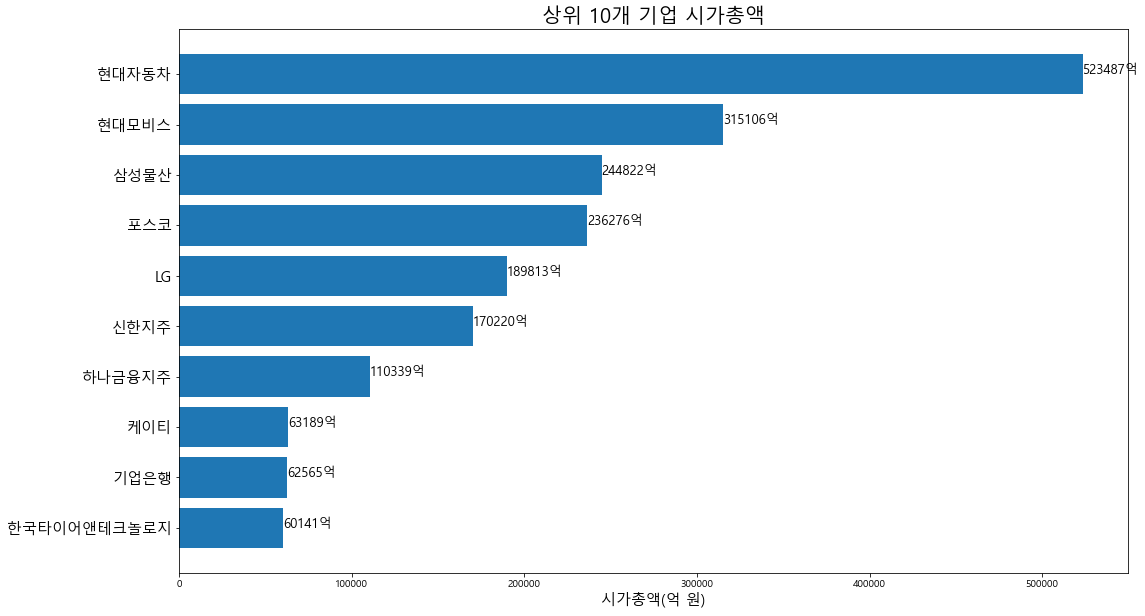

In [7]:
attr = data2['회사명'][357:]
v1 = data2['시가총액(억)'][357:]

plt.figure(figsize=(17,10))
plt.barh(attr, v1, tick_label=attr)
plt.title('상위 10개 기업 시가총액', fontsize=20)
plt.xlabel('시가총액(억 원)', fontsize=15)
plt.yticks(fontsize=15)

for i in data2[357:].index:
    detail = '%d억'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)

plt.show()

In [8]:
data2['업종2'][357:].unique()

array(['자동차부품', '은행', '다각화된통신서비스', '복합기업', '철강', '자동차'], dtype=object)

## 2.2 업종별 시가총액 평균

In [9]:
market_mean = data2.groupby('업종2')['시가총액(억)'].mean().sort_values(ascending=True)
print(len(market_mean))
market_mean

48


업종2
항공화물운송과물류          358.000000
출판                 568.000000
가정용품               730.666667
전자제품               754.000000
화장품                769.000000
소프트웨어              862.000000
광고                 936.000000
디스플레이장비및부품        1107.000000
도로와철도운송           1132.000000
전자장비와기기           1156.000000
건강관리장비와용품         1216.666667
전기제품              1265.800000
상업서비스와공급품         1308.000000
종이와목재             1733.285714
음료                1764.600000
게임엔터테인먼트          1806.333333
포장재               1868.111111
기타금융              2045.000000
비철금속              2065.727273
복합유틸리티            2203.000000
IT서비스             2590.142857
섬유,의류,신발,호화품      2730.000000
제약                2932.363636
화학                3278.400000
가스유틸리티            3414.600000
건설                3470.000000
부동산               3491.500000
식품과기본식료품소매        3578.000000
건축자재              3625.900000
가구                3813.000000
식품                4126.066667
반도체와반도체장비         4322.400000
무역회사와판매업체         6435.000000
인터넷과카탈

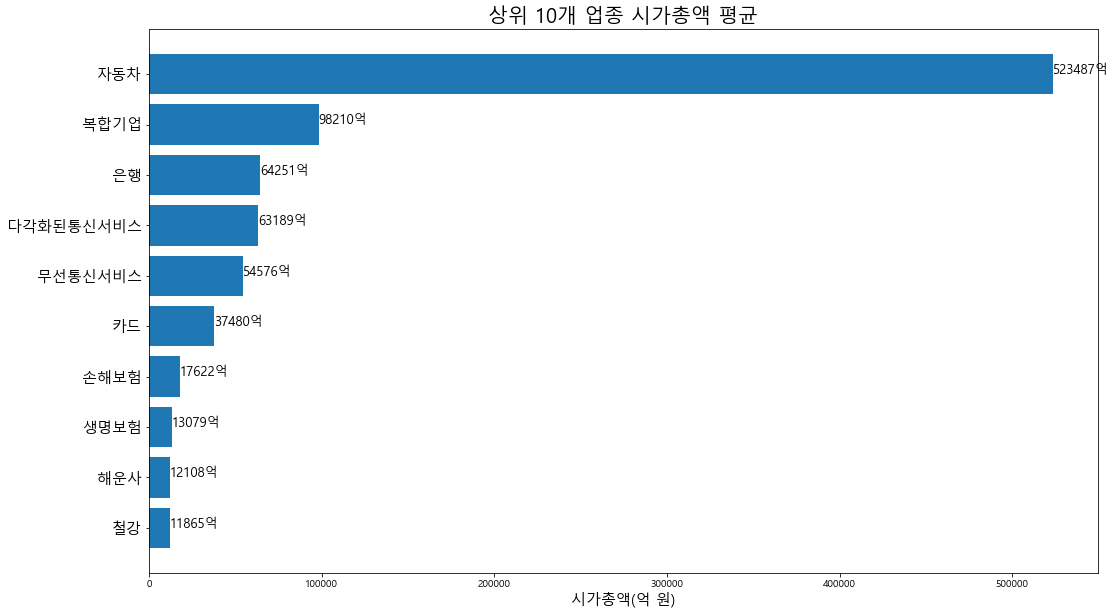

In [10]:
attr = market_mean[38:].index
v1 = market_mean[38:]

plt.figure(figsize=(17,10))
plt.barh(attr, v1, tick_label=attr)
plt.title('상위 10개 업종 시가총액 평균', fontsize=20)
plt.xlabel('시가총액(억 원)', fontsize=15)
plt.yticks(fontsize=15)

for i in range(len(v1)):
    detail = '%d억'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)

plt.show()

## 2.3 업종별 시가총액 최대값

In [11]:
market_max = data2.groupby('업종2')['시가총액(억)'].max().sort_values(ascending=True)
print(len(market_max))
market_max

48


업종2
항공화물운송과물류          358.0
출판                 568.0
광고                 936.0
가정용품               955.0
화장품               1115.0
소프트웨어             1130.0
전자제품              1556.0
디스플레이장비및부품        1767.0
건강관리장비와용품         1891.0
도로와철도운송           1896.0
복합유틸리티            2203.0
전기제품              2330.0
기타금융              2382.0
게임엔터테인먼트          2691.0
전자장비와기기           2918.0
상업서비스와공급품         3139.0
종이와목재             3306.0
음료                3585.0
포장재               4111.0
가구                4436.0
부동산               4872.0
제약                6894.0
건축자재              7723.0
가정용기기와용품          8357.0
비철금속              8365.0
식품과기본식료품소매        8637.0
가스유틸리티            9230.0
반도체와반도체장비         9654.0
인터넷과카탈로그소매        9792.0
무역회사와판매업체        10601.0
IT서비스            11822.0
건설               13588.0
화학               14919.0
섬유,의류,신발,호화품     16262.0
식품               17548.0
우주항공과국방          21923.0
해운사              25846.0
생명보험             26056.0
손해보험             27577.0
증권               3306

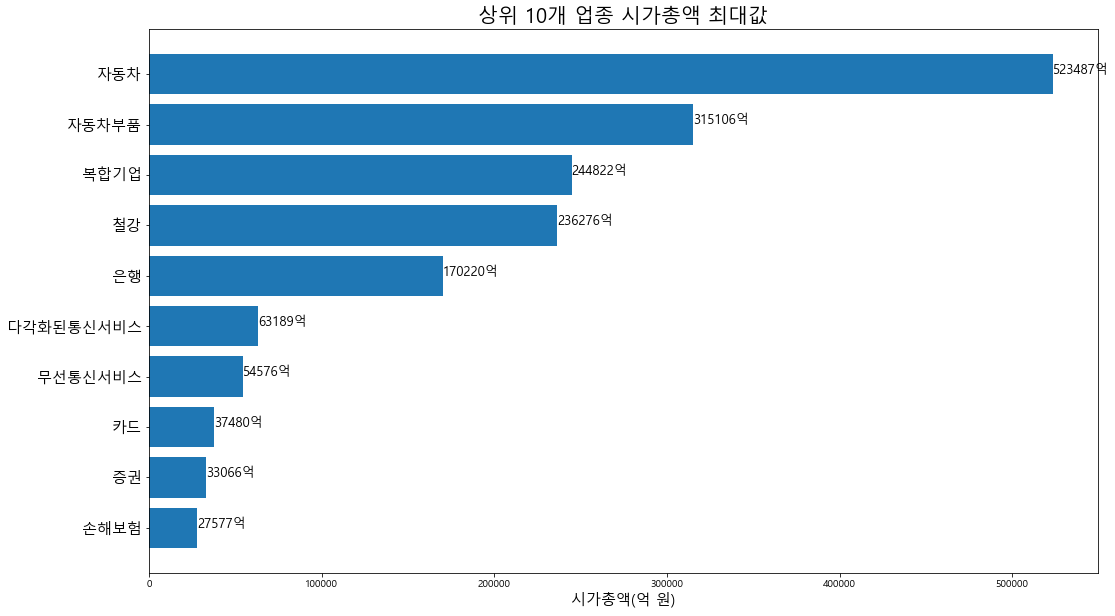

In [12]:
attr = market_max[38:].index
v1 = market_max[38:]

plt.figure(figsize=(17,10))
plt.barh(attr, v1, tick_label=attr)
plt.title('상위 10개 업종 시가총액 최대값', fontsize=20)
plt.xlabel('시가총액(억 원)', fontsize=15)
plt.yticks(fontsize=15)

for i in range(len(v1)):
    detail = '%d억'%v1[i]
    plt.text(v1[i], attr[i], detail, fontsize=13)

plt.show()

In [13]:
# 업종별 시가총액 1위 기업
data2.loc[data2.groupby('업종2')['시가총액(억)'].idxmax()]['회사명'].values

array(['다우기술', '에이스침대', 'SK가스', '쿠쿠홀딩스', '태양', '레이언스', '대림산업', '한일시멘트',
       '게임빌', '지투알', '대덕', '케이티', 'AJ네트웍스', '이라이콤', 'LG유플러스', 'LG상사',
       '솔브레인홀딩스', '삼성물산', 'KG ETS', '한국자산신탁', '풍산', '아이마켓코리아', '한화생명',
       '영원무역', '텔코웨어', 'DB손해보험', '농심', '현대그린푸드', '한화에어로스페이스', '신한지주',
       '하이트진로홀딩스', '현대홈쇼핑', '현대자동차', '현대모비스', '삼영전자공업', '모다이노칩', '휴맥스',
       '동아쏘시오홀딩스', '무림P&P', 'NH투자증권', '포스코', '아시아경제', '삼성카드', '아세아제지',
       '삼일', '팬오션', '컬러레이', '코오롱인더'], dtype=object)

- **시가총액** : 현대자동차(자동차) > 현대모비스(자동차부품) > 삼성물산(복합기업) > 포스코(철강) > LG(복합기업) > 신한지주(은행) > 하나금융지주(은행) > 케이티(다각화된통신서비스) > 기업은행(은행) > 한국타이어앤테크놀로지(자동차부품)


- **업종별 시가총액 평균** : 자동차 > 복합기업 > 은행 > 다각화된통신서비스 > 무선통신서비스 > 카드 > 손해보험 > 생명보험 > 해운사 > 철강


- **업종별 시가총액 최대값**: 자동차 > 자동차부품 > 복합기업 > 철강 > 은행 > 다각화된통신서비스 > 무선통신서비스 > 카드 > 증권 > 손해보험

시가총액뿐만 아니라 업종까지 고려하여 포트폴리오를 구성할 필요가 있음

시가총액 상위 10% 기업들을 대상으로 하되, 업종별 1위 기업을 찾는 것이 좋을지 업종별 per가 가장 낮은 기업을 찾는 것이 좋을지 추후 결정

    업종별 시가총액 1위 기업 - 해당 업종에 호재가 있을 경우 주가가 가장 먼저 오를 것으로 예상
     vs
    업종별 per가 가장 낮은 기업 - 추가 상승 여력이 많을 것으로 예상

# 3. 저평가 된 우량주 기업 찾기

In [14]:
# 시가총액 상위 10%
data3 = data.sort_values(by='시가총액(억)', ascending=False).reset_index(drop=True)[:35]

In [15]:
# 업종별 시가총액 1위 기업
data3_1 = data3.loc[data3.groupby('업종2')['시가총액(억)'].idxmax()].sort_values(by='시가총액(억)', ascending=False).reset_index(drop=True)
data3_1.head(10)

,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억)
0,현대자동차,005380,자동차용 엔진 및 자동차 제조업,자동차,58.96,58.54,0.92,523487.0
1,현대모비스,012330,자동차 신품 부품 제조업,자동차부품,46.67,20.22,0.94,315106.0
2,삼성물산,028260,기타 전문 도매업,복합기업,29.11,21.95,0.89,244822.0
3,포스코,005490,1차 철강 제조업,철강,41.60,24.82,0.48,236276.0
4,신한지주,055550,기타 금융업,은행,4.87,4.73,0.40,170220.0
5,케이티,030200,전기 통신업,다각화된통신서비스,11.95,10.31,0.42,63189.0
6,LG유플러스,032640,전기 통신업,무선통신서비스,13.56,6.89,0.72,54576.0
7,삼성카드,029780,기타 금융업,카드,9.10,9.09,0.49,37480.0
8,NH투자증권,005940,금융 지원 서비스업,증권,6.53,5.71,0.61,33066.0
9,DB손해보험,005830,보험업,손해보험,6.87,4.96,0.35,27577.0


In [16]:
# 업종별 per가 가장 낮은 기업
data3_2 = data3.loc[data3.groupby('업종2')['PER'].idxmin()].sort_values(by='시가총액(억)', ascending=False).reset_index(drop=True)
data3_2.head(10)

,회사명,종목코드,업종,업종2,업종PER,PER,PBR,시가총액(억)
0,현대자동차,005380,자동차용 엔진 및 자동차 제조업,자동차,58.96,58.54,0.92,523487.0
1,포스코,005490,1차 철강 제조업,철강,41.60,24.82,0.48,236276.0
2,LG,003550,기타 금융업,복합기업,29.11,15.55,0.94,189813.0
3,케이티,030200,전기 통신업,다각화된통신서비스,11.95,10.31,0.42,63189.0
4,LG유플러스,032640,전기 통신업,무선통신서비스,13.56,6.89,0.72,54576.0
5,삼성카드,029780,기타 금융업,카드,9.10,9.09,0.49,37480.0
6,한화생명,088350,보험업,생명보험,12.49,11.41,0.16,26056.0
7,팬오션,028670,해상 운송업,해운사,116.29,19.11,0.85,25846.0
8,메리츠증권,008560,금융 지원 서비스업,증권,6.53,4.75,0.61,25653.0
9,한화에어로스페이스,012450,"항공기,우주선 및 부품 제조업",우주항공과국방,50.80,30.36,0.87,21923.0


In [17]:
data3_1.to_csv('./data/우량주저평가기업_시가총액.csv', index=False)
data3_2.to_csv('./data/우량주저평가기업_PER.csv', index=False)